In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def function(x):
    return(np.cos(x))

In [27]:
xmin = 0.
xmax = float(1.75)
n = 400000

X=np.linspace(xmin,xmax,n)

In [28]:
def boundaryFinder(func):
    y=func
    ymin=y[0]
    ymax=[-1]
    for i in range(len(y)):
        if(ymin>y[i]):
            ymin=y[i]
        elif(ymax<y[i]):
            ymax=y[i]
    return ymin,ymax

In [29]:
def integrate(xmin,xmax,n):
    ymin,ymax=boundaryFinder(function(X))
    area=(xmax-xmin)*(ymax-ymin)
    check=[]
    xs=[]
    ys=[]
    for i in range(n):
        x=np.random.uniform(xmin,xmax,1)
        xs.append(x)
        y=np.random.uniform(ymin,ymax,1)
        ys.append(y)
        if abs(y)>abs(function(x)) or y<0:
            check.append(0)
        else:
            check.append(1)
    #print("x boundaries" , xmin,xmax, "y boundaries" , ymin,ymax)
    ans=(np.mean(check)*area)
    return ans
#print(integrate(xmin,xmax,n))

1.0125986518970842


In [30]:
ymin,ymax=boundaryFinder(function(X))
x=np.random.uniform(xmin,xmax,10000)
y=np.random.uniform(ymin,ymax,10000)

In [31]:
ir = np.where((y)<function(x))[0]
ur = np.where((y)>=function(x))[0]

In [39]:
def plot(xmin,xmax,x,y,ur,ir,):
    fig = plt.figure(figsize=(7,7))
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.plot(x[ir],y[ir],'.',color='blue',label = "points below")
    plt.plot(x[ur],y[ur],'.',color="0.75", label = "points above")
    xc = X
    yc = function(xc)
    plt.plot(xc,yc,color='green',label = "f(x)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=1,framealpha=0.95)
    plt.show()

In [40]:
tol = 0.01
imax=50

In [41]:
real_answer = np.sin(1.75)-np.sin(0)
ans=integrate(xmin,xmax,n)
print(real_answer)

0.9839859468739369


In [42]:
def monteCarloWrap(n,tol,imax):
    i=0
    N=n
    while(abs(real_answer-ans)>tol and i<imax):
        #print(ans)
        i+=1
        N+=2
        #ans=integrate(xmin,xmax,n)
    if(imax==i):
        print("answer=",ans)
        print("The maximum number of iterations has been reached",i)
    print("Number of points=",N)
    error_monte = np.abs(ans - real_answer)
    print("error =" ,error_monte)
    plot(xmin,xmax,x,y,ur,ir,)
    return ans

answer= 1.0145110925261605
The maximum number of iterations has been reached 50
Number of points= 400100
error = 0.03052514565222353


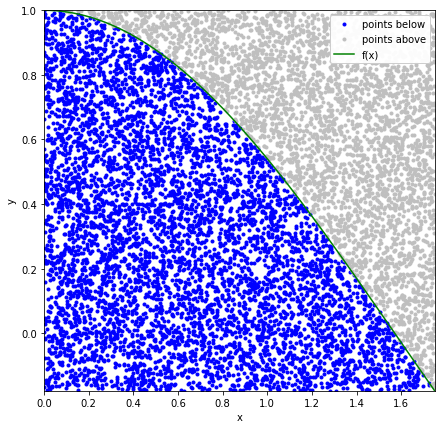

1.0145110925261605

In [43]:
monteCarloWrap(n,tol,imax)